## Load Packages

In [25]:
using Pkg
# Pkg.add("RCall")
using RCall
include("./printmat.jl")

using Plots
# gr(size=(600,400))
#pyplot(size=(600,400))    
gr(size=(480,320))
default(fmt = :svg)

# Calling R from Julia
R is the leading programming language when it comes to statistics and econometrics. Its power emerges from thousands of well documented packages oftentimes written by professors and leading researchers themselves. When time is scarce to code lines of GARCH estimation code or systems of VAR equations, a good option is to transfer data to R and let it do the computations. The (registered) package needed is `RCall`. There are several ways of interacting with R in Julia, all are more or less equally straightforward. We will stick to treating R as a black box: put in the data, press a button of required label and extract the result. Full and easy-to-understand documentation is available [here](http://juliainterop.github.io/RCall.jl/stable/index.html).

# Task 1 (10 points)
Using R from Julia, simulate two sequences (100 values each) following Cauchy distribution with location = 0 and scale = 1. Transport them to Julia and assign them to variables `y1` and `y2`. The documentation on Cauchy distribution in R is [here](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Cauchy.html).

In [40]:
R"y1 <- rcauchy(100, location = 0, scale = 1)"
R"y2 <- rcauchy(100, location = 0, scale = 1)"

RObject{RealSxp}
  [1]  -7.244468866   0.847779270  -1.082416847  -0.651576274  -0.148679750
  [6]  46.464599968   3.471882957  -0.270558850  -0.993496171  -0.951280297
 [11]   0.273606194  12.045965976   3.071353942  -0.531499387   0.692925194
 [16]  -0.450799069  -0.692106099  -4.776544992   1.234736993  -0.169060122
 [21]  -0.102353746   1.355505764  -2.995360055   1.143103092  -0.798638660
 [26]   1.175529673  -0.240438555   3.576590795  -0.173720442  -0.615909402
 [31]  -0.280300361   0.233946784  -1.191984555   2.335007457   0.447814783
 [36]  -1.717073994  -0.339348783  -1.626897344  -1.872519546 -25.147153715
 [41]  -1.808880527   1.237149087   1.415063353   0.539924469   1.014416002
 [46]   0.166336026   0.298964990   1.336696623  -0.006271213  -0.735993539
 [51]  -4.965217798  -0.121421692   1.212729661 -26.200395124  -3.216235381
 [56]   0.015580038   0.547205468   0.829951222  -2.861677037  -5.197022895
 [61]   0.799260276   3.973996656  -1.562077153   0.199285650  -0.31884

In [36]:
@rget y1 y2

println("y1")
print(y1)
println("\ny2")
print(y2)

y1
[-31.55821572534249, 0.5300362367065363, -1.0904282948511226, -4.0406123926708855, 197.24928809746663, 1.5502485728868574, -0.18662992698031694, -0.3300397159360846, -0.7127604077564949, 0.0030992918438616673, 6.226539735223217, -4.3485616341358915, -3.3178984241697913, 3.6116882432892323, 0.9225408238550203, 0.4314494690799277, 0.8552284188932663, 0.4575301607312544, -5.000913735208004, 0.07806622567685487, -0.4999920214220553, 8.188348730240442, -1.223239645210061, 0.25561735111015654, 0.15178339277588176, 0.5618853377909098, -0.09547610209551784, -2.0532482235607703, 1.260012439165121, -43.09100924517277, -2.966408703043354, 3.513248949543934, -20.53248103836206, -0.26111265893321517, -0.18164621004629938, 1.4770842186413675, 0.09458506456302686, -0.6430436136258214, 0.5748498760666672, -4.183623547307209, -0.06791317544648086, 1.2065556353209663, 0.41538680165938435, 0.25203163901334963, 0.6861197523240763, 0.39189839739555027, -0.24236414651868257, -0.14109391193587995, 0.24252

In [6]:
@rget y1 y2

println("y1")
print(y1)
println("\ny2")
print(y2)

y1


[0.2716595082133937, 0.31375455759623183, 0.23615524986738443, 0.31104644887891136, 0.10853557799331377, 0.0837400337886975, 0.190846458655687, 0.17841200323759018, 0.3021881223310938, 0.08423413208947693, 0.2532986252517025, 0.12621080988242728, 0.06555948701094444, 0.2244799744996258, 0.10127837676892831, 0.2743414055171367, 0.23247712625174405, 0.31640417110612534, 0.1266211139647908, 0.0820446785999432, 0.21023221126070843, 0.31181953047044825, 0.3183061965185359, 0.318023137448885, 0.29449786442169834, 0.1698416709106755, 0.211749675299896, 0.11906675329897455, 0.2528091763207466, 0.2069701701114787, 0.12273104937060149, 0.10989184508075897, 0.2965387313242635, 0.23328152980816036, 0.31721631174697196, 0.12842245909575908, 0.08705974568477304, 0.08348703216867753, 0.3131736158264967, 0.18789263829138964, 0.1484393530784246, 0.3060601361256871, 0.30884785194854886, 0.3062505916799342, 0.2273549111479069, 0.2659951425351212, 0.08608511658131968, 0.31223776836676986, 0.31698727553018

# Task 2 (10 points)
Compute the summary statistics of the two sequences with the `summary` function. Print the output.

In [45]:
R"summary(y1)"

RObject{RealSxp}
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-141.65905   -1.33590   -0.08866   -0.46860    0.59458  110.55740 


In [44]:
R"summary(y2)"

RObject{RealSxp}
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-27.2789  -1.0157  -0.1119  -0.3435   1.0044  46.4646 


# Task 3 (10 points)
Create a Q-Q plot of `y1` vs. the normal distribution using function `qqnorm`. In general, a Q-Q plot compares the quantiles of two distribution against each other. If the distribution are equal, all quantiles have to lie on the 45 degree line.

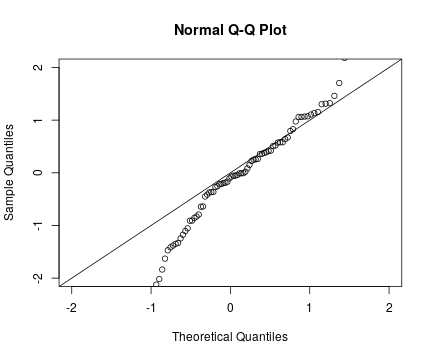

RObject{NilSxp}
NULL


In [83]:
R"qqnorm(y1, ylim=c(-2,2),xlim=c(-2,2))"
R"abline(a = 0, b = 1)"

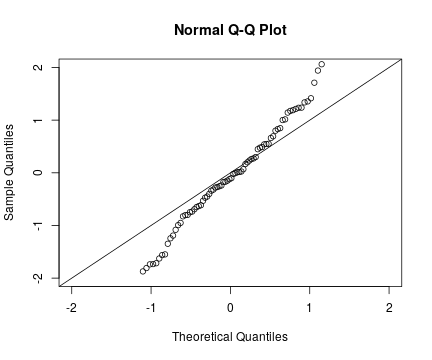

RObject{NilSxp}
NULL


In [82]:
R"qqnorm(y2, ylim=c(-2,2),xlim=c(-2,2))"
R"abline(a = 0, b = 1)"

# Task 4 (30 points)
Write a simple function that returns the fitted residuals from a linear regression `y ~ x`. In R, having estimated a model with

```
mod = lm(y ~ x),
```

residuals can be extracted as

```
res = resid(mod)
``` 

Follow the sketch below.

```
"""
Fetch the residuals from a linear regression y ~ x.

Parameters
----------
x : Array
    regressor
y : Array
    response
addconstant : Bool
    true if constant should be added to `x`

Returns
-------
res : Array
    of fitted residuals
"""
function ols_resid(x::Array, y::Array; addconstant::Bool=false)

    return
    
end
```

In [85]:
"""
Fetch the residuals from a linear regression y ~ x.

Parameters
----------
x : Array
    regressor
y : Array
    response
addconstant : Bool
    true if constant should be added to `x`

Returns
-------
res : Array
    of fitted residuals
"""
function ols_resid(x::Array, y::Array; addconstant::Bool=false)
 
    @rput x y
   
    formula = string("mod <- lm(y ~ x", addconstant ? "" : "-1", ")")
    
    reval(formula)
    
    reval("res <- resid(mod)")
    
    @rget res
    
    return convert(Array{Float64, 1}, res)
end

ols_resid

# Task 5 (15 points)
Create a third variable `y3` as follows:
```
y3 = 2.5 - 3*y1 + y2
```
and use your `ols_resid` function to fetch the residuals from regressing `y3` on `y1` (with a constant). Compute their summary statistics using the `summary` function.

In [86]:
y3 = 2.5 .- 3 .*y1 .+ y2;

@rput y3;

In [89]:
ols_resid(y1,y3;addconstant=true);
R"summary(res)"

RObject{RealSxp}
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-38.8619  -0.9665   0.1432   0.0000   1.2258  15.3024 


# Task 6 (25 points)
This excercise is for ambitious students who would like to receive a high mark.

K-means clustering is one of the most commonly used unsupervised machine learning algorithm for partitioning a given dataset into a set of k groups (i.e. k clusters), where k represents the number of groups pre-specified by the analyst. It classifies objects in multiple groups (i.e., clusters), such that objects within the same cluster are as similar as possible (i.e., high intra-class similarity), whereas objects from different clusters are as dissimilar as possible (i.e., low inter-class similarity). In k-means clustering, each cluster is represented by its center (i.e, centroid) which corresponds to the mean of points assigned to the cluster.

Run k-means clustering analysis on the built in R dataset ``USArrests``. This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas. Set the number of clusters equal to 3 (``centers=3``) and use 25 (``nstart=25``) as a starting value for k-means (feel free to experiment with other starting values). Scale the input data to have zero mean and standard deviaiton of unity. Use the ``fviz_cluster`` function from the Rpackage ``factoextra`` to visualise the result i.e. plot the clusters. The following [link](http://luiarthur.github.io/usingrcall) is useful for how to use ``RCall``.



Hint: Part of this exercise is to install and load the ``factoextra`` package in R.
```
R"options(repos='http://cran.rstudio.com/')"
"install R package"
"load R package"
```

In [102]:
# some essential setting for installation to be possible
R"options(repos='http://cran.rstudio.com/')"
R"install.packages('factoextra',lib='../../myRpackages/')"

* installing *source* package ‘factoextra’ ...
** package ‘factoextra’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (factoextra)
┌ Warning: RCall.jl: trying URL 'http://cran.rstudio.com/src/contrib/factoextra_1.0.5.tar.gz'
│ Content type 'application/x-gzip' length 1390733 bytes (1.3 MB)
│ ==================================================
│ downloaded 1.3 MB
│ 
│ 
│ The downloaded source packages are in
│ 	‘/tmp/RtmpC4xx5k/downloaded_packages’
└ @ RCall /home/user/.julia/packages/RCall/g7dhB/src/io.jl:113


RObject{NilSxp}
NULL


In [119]:
R"library(datasets)"
R"scdata <- scale(USArrests)"
R"head(scdata)"

RObject{RealSxp}
               Murder   Assault   UrbanPop         Rape
Alabama    1.24256408 0.7828393 -0.5209066 -0.003416473
Alaska     0.50786248 1.1068225 -1.2117642  2.484202941
Arizona    0.07163341 1.4788032  0.9989801  1.042878388
Arkansas   0.23234938 0.2308680 -1.0735927 -0.184916602
California 0.27826823 1.2628144  1.7589234  2.067820292
Colorado   0.02571456 0.3988593  0.8608085  1.864967207


In [114]:
R"colMeans(scdata,dims=1)"

RObject{RealSxp}
       Murder       Assault      UrbanPop          Rape 
-7.667478e-17  1.111611e-16 -4.332645e-16  8.938163e-17 


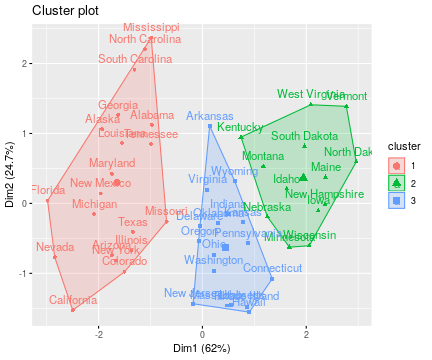

RObject{VecSxp}


In [128]:
R"library(factoextra)"
R"km.res <- kmeans(scdata, 3, iter.max = 10, nstart = 25)"
R"fviz_cluster(km.res, USArrests)"